# Bike Sharing Assignment
Build a multiple linear regression model for the prediction of demand for shared bikes
## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:
We are building a model to identify the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

The model should be built taking this 'cnt' as the target variable


The steps involved in this exercise are as follows,
1. Reading, understanding, EDA and visualising of data
2. Preparing the data for modelling (train-test split, rescaling etc)
3. Training the model 
4. Residual Analysis
5. Predictions and evaluation on the data set

## Step 1: Reading, understanding and visualising of data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

C:\Users\nihaa\AppData\Local\Temp\ipykernel_5564\1440599878.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Data Importing

In [528]:
# read the data to data frame
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Data understanding

In [529]:
# check the shape of the data
bike.shape

(730, 16)

In [530]:
# Verify the columns type and check any missing values
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [531]:
# Describing the columns of the data. This provides statistical summary of the data
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [532]:
# checking for the null values in column data
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [533]:
# Checking duplicates if any 
bike_dup = bike.copy()
bike_dup.drop_duplicates(subset=None, inplace=True)

In [534]:
# checking shape to confirm any duplicates are removed
bike_dup.shape

(730, 16)

Analysis So far,
- Data set has 16 columns and 730 rows
- Data set has no missing values
- Out of 16 columns, one column is with date type
- Some fields are categorical in nature
- No duplicates in data set

In [535]:
# Drop columns that doesn't have any values like casual and registered. cnt has the count of both Casual and registered column
bike.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [536]:
# Check the shape
bike.shape

(730, 12)

In [537]:
# Rename few columns names for data understanding
bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

Map all values of categorical variables from data dictionary
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- m0nth : month ( 1 to 12)
- weekday : day of the week
0 year : 2018(0), 2019(1)
- weathersit : 
    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds


In [538]:
# Map the values of categorical values from data set
bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike.month = bike.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Mist',3:'Light_snow',4:'Heavy_snow'})
# bike.year = bike.year.map({0:'2018',1:'2019'})

In [539]:
# check the updated data set
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [540]:
# All below are independent variables
bike.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### EDA & Visualising the data

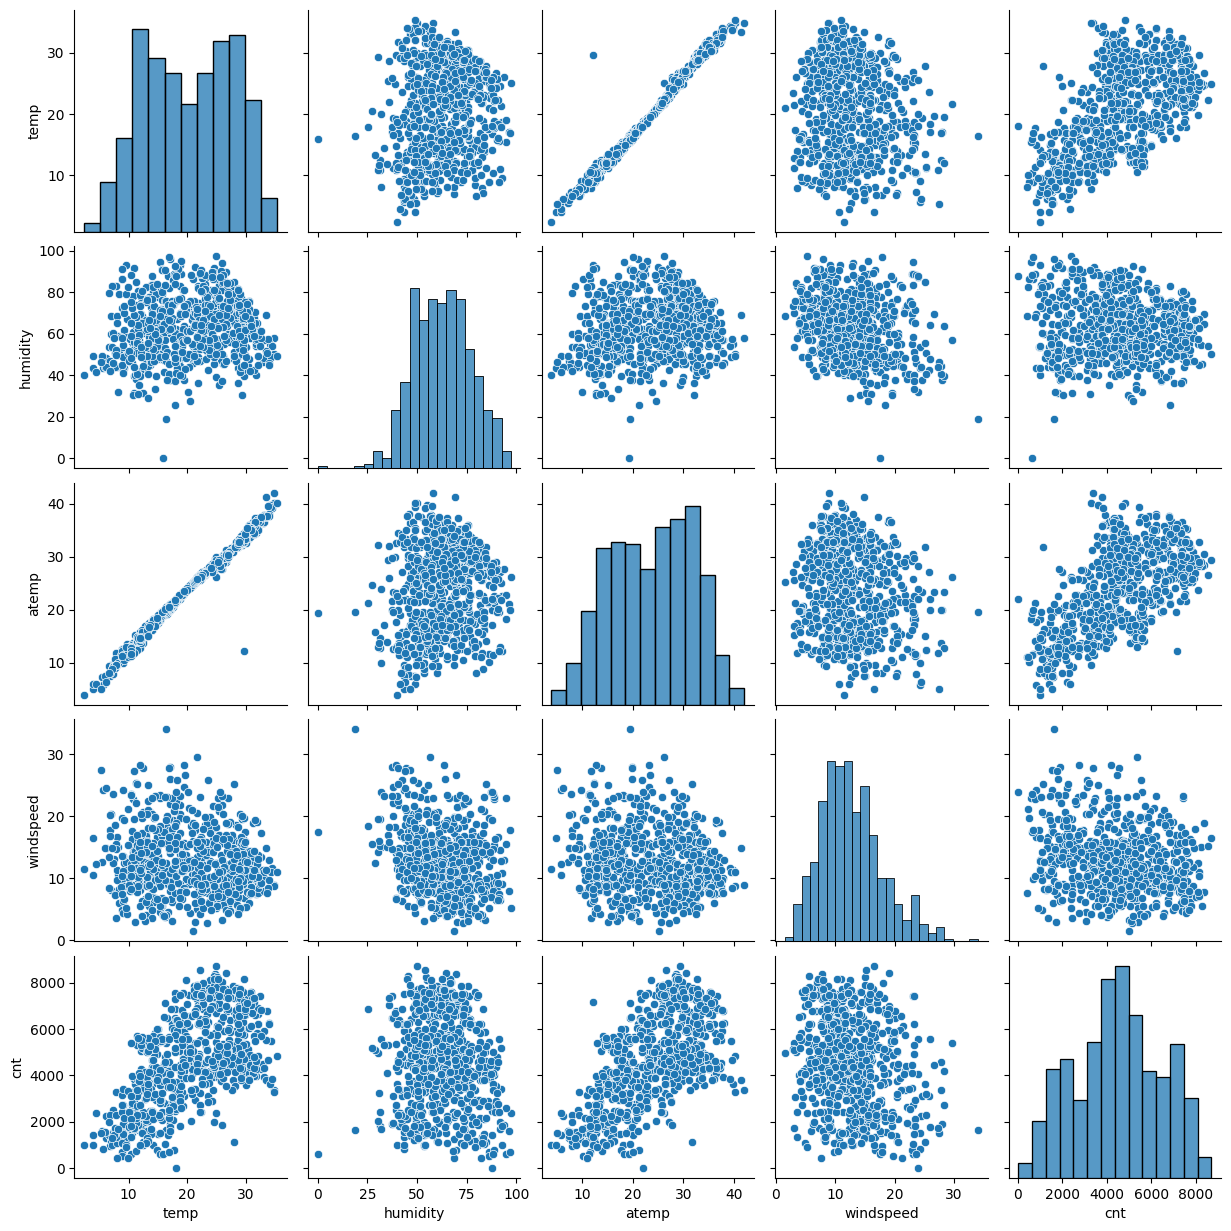

In [541]:
# visualising using pairplot for numeric variables
sns.pairplot(bike, vars=['temp','humidity','atemp','windspeed',"cnt"])
plt.show()

Analysis from Pairplot
- There is a linear relationship between temp and atemp
- There is some positive linear trend between cnt, temp and atemp 

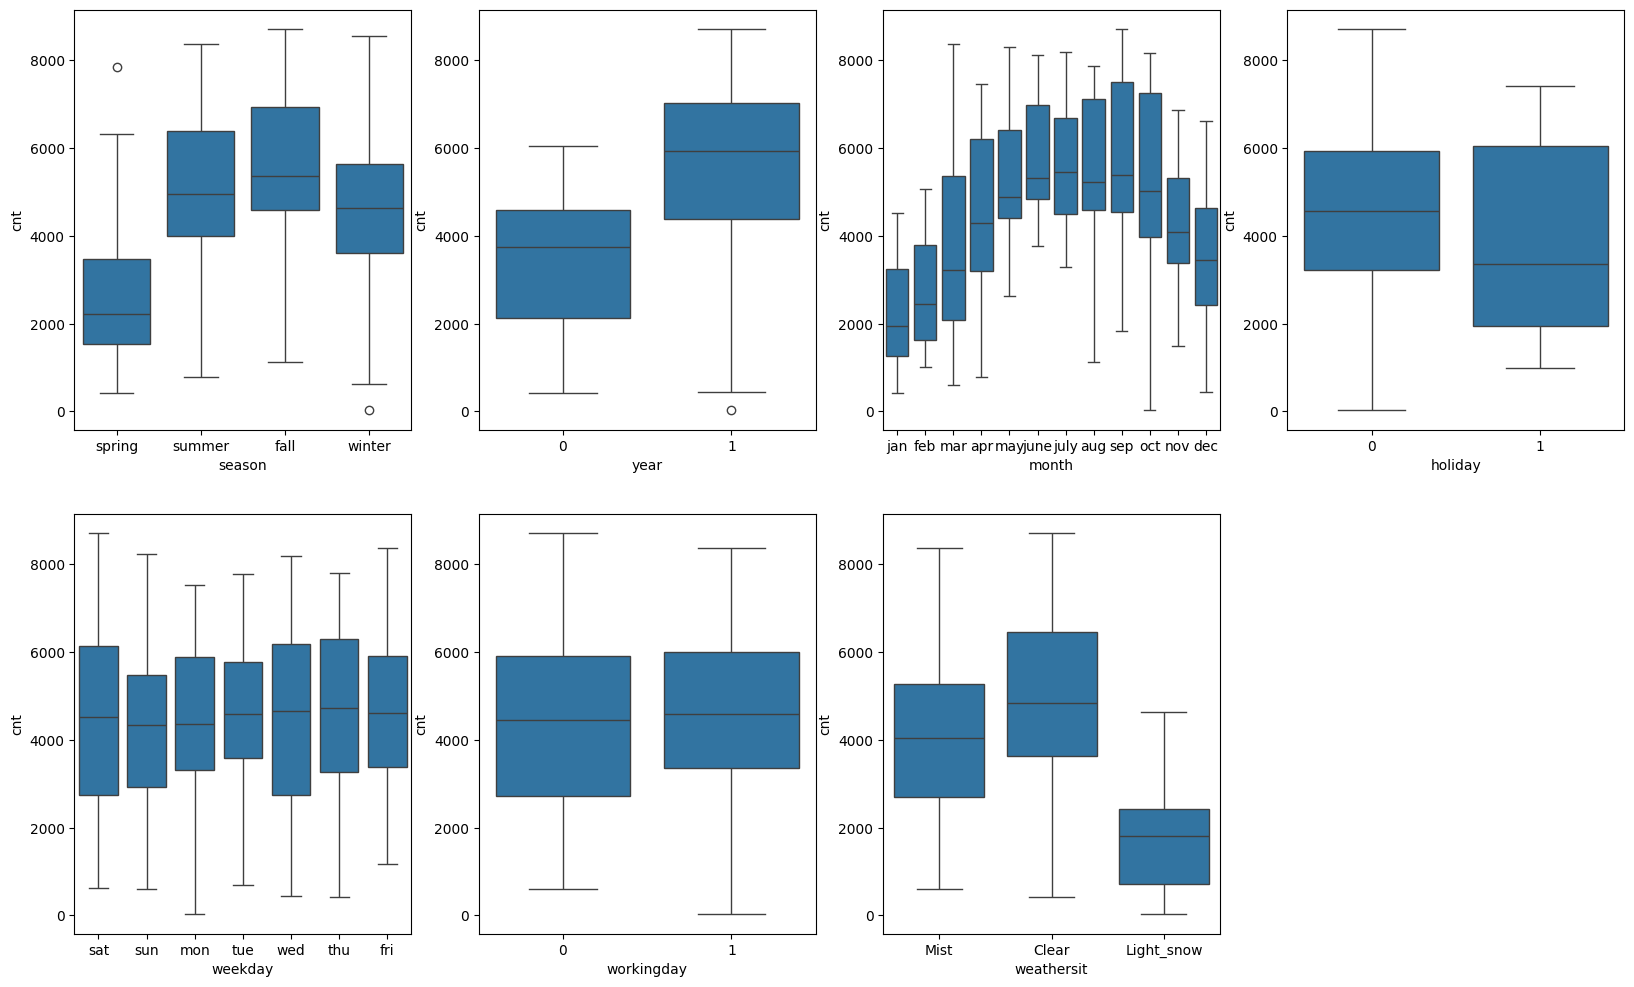

In [542]:
# Visualizing the categorical columns from the data set

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'year', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

Analysis from boxplot,
- There are increase in rental bikes count during summer, fall and winter
- Count of rental bikes increased during April till November
- We see the total people rented during holiday has more distributed count than working day
- Not much difference on weekdays and working days
- We see the difference during clear weathersit which is obvious

### Step 2: Preparing the data for modelling (train-test split, rescaling etc)
- Encoding: 
    - Categorical variable to dummy variable
- Splitting into train and test 
- Rescaling of variables

In [543]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [544]:
# # Dropping year column as its not required for categorical difference
# bike.drop(['year'], axis = 1, inplace = True)

In [545]:
# bike.head()

### Dummy variables

In [546]:
# creating dummy variables for categorical variables
season_data = pd.get_dummies(bike['season'], dtype=int, drop_first=True)
month_data = pd.get_dummies(bike['month'], dtype=int, drop_first=True)
weekday_data = pd.get_dummies(bike['weekday'], dtype=int, drop_first=True)
weathersit_data = pd.get_dummies(bike['weathersit'], dtype=int, drop_first=True)

# Merging the dummy variable data set
bike = pd.concat([bike,season_data,month_data,weekday_data,weathersit_data],axis=1) 
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [547]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  spring      730 non-null    int32  
 13  summer      730 non-null    int32  
 14  winter      730 non-null    int32  
 15  aug         730 non-null    int32  
 16  dec         730 non-null    int32  
 17  feb         730 non-null    int32  
 18  jan         730 non-null    int32  
 19  july        730 non-null    i

In [548]:
# dropping original columns as the dummy variable are already added to data set
bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [549]:
bike.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [550]:
# Columns has been increased due to dummy variables
bike.shape

(730, 30)

In [551]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    int32  
 9   summer      730 non-null    int32  
 10  winter      730 non-null    int32  
 11  aug         730 non-null    int32  
 12  dec         730 non-null    int32  
 13  feb         730 non-null    int32  
 14  jan         730 non-null    int32  
 15  july        730 non-null    int32  
 16  june        730 non-null    int32  
 17  mar         730 non-null    int32  
 18  may         730 non-null    int32  
 19  nov         730 non-null    i

### Splitting into train and test

In [552]:
# Splitting the train and test data set
df_train, df_test = train_test_split(bike, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [553]:
# Check the Train data set
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


### Rescaling the Features
Rescale the variables so that they have a comparable scale
- Min-Max scaling (normalisation): Between 0 and 1 --> Takes care of Outliers, mostly preferred one. # normalisation: (x - xmin) / (xmax - xmin) 

In [554]:
# 1. Instantiate an object 
scaler = MinMaxScaler()

# create a list of numeric variables 
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

# 2. Fit on data

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [555]:
df_train[num_vars].describe()

,temp,atemp,humidity,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


From the above data, we are seeing all the units of the coefficients obtained are all on the same scale

### Step 3: Training the model

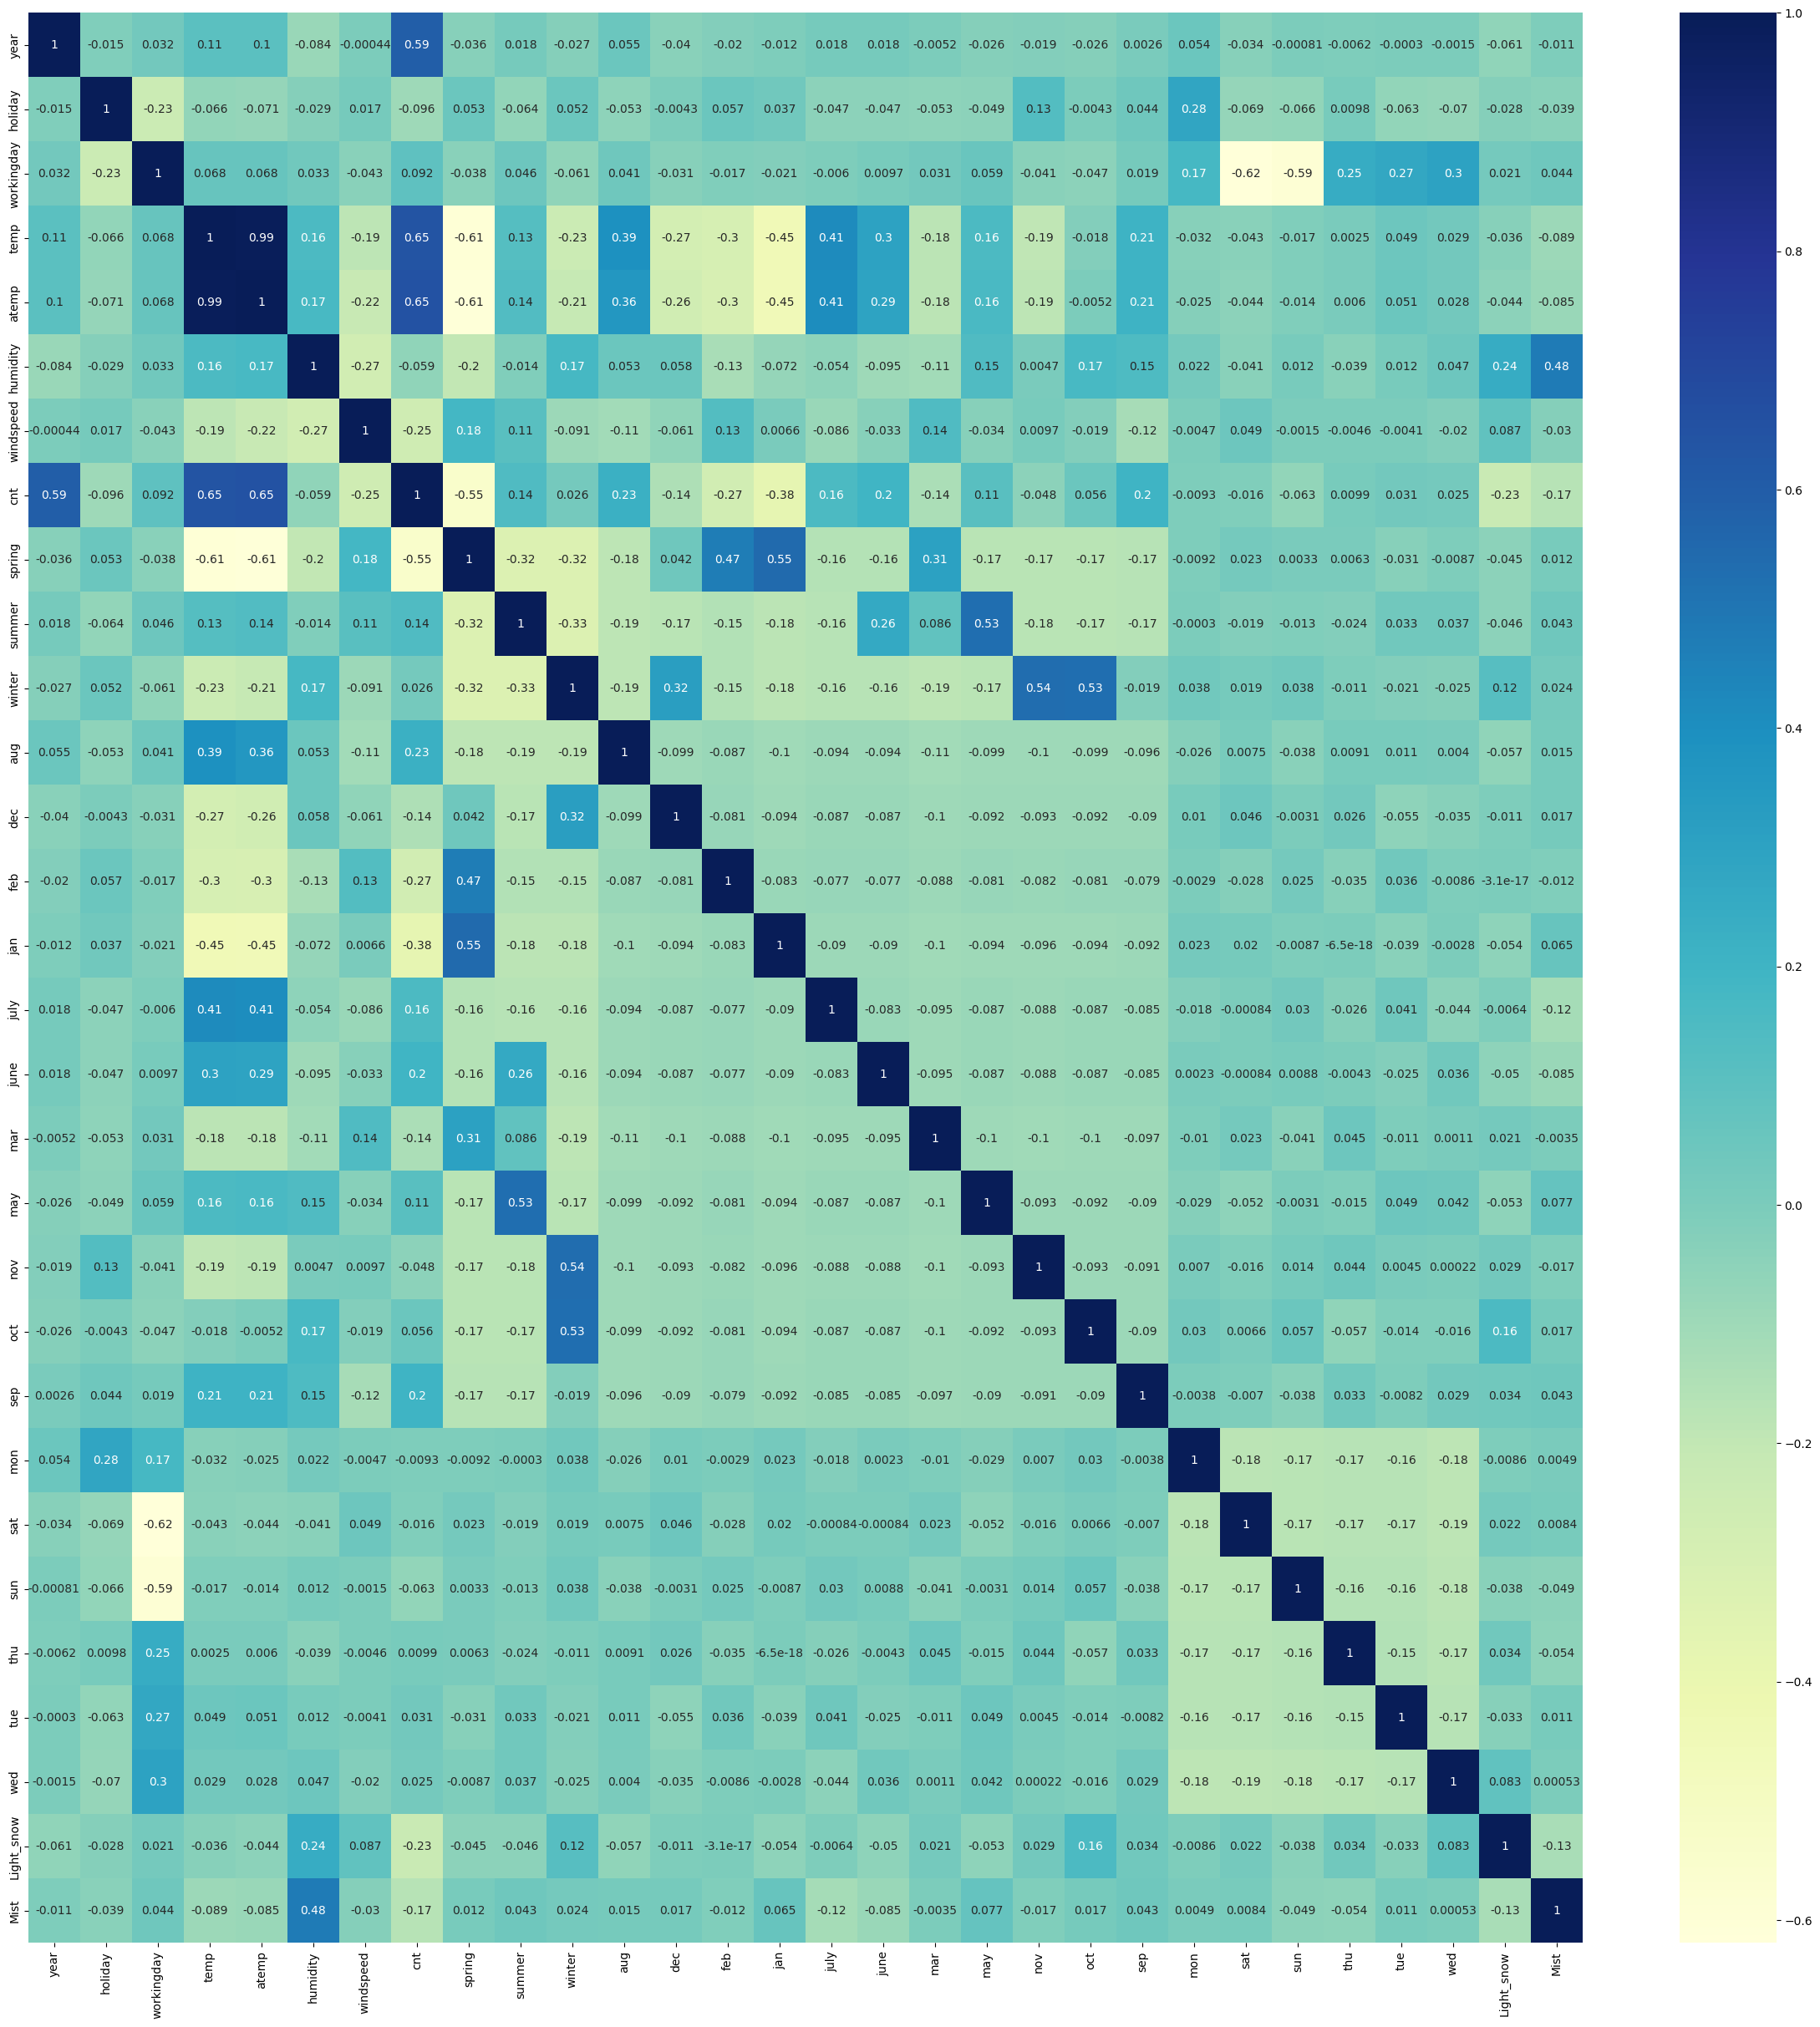

In [556]:
# heatmap to get the correlation coefficients to identify the variables that are highly correlated
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(), annot = True,  cmap="YlGnBu")
plt.show()

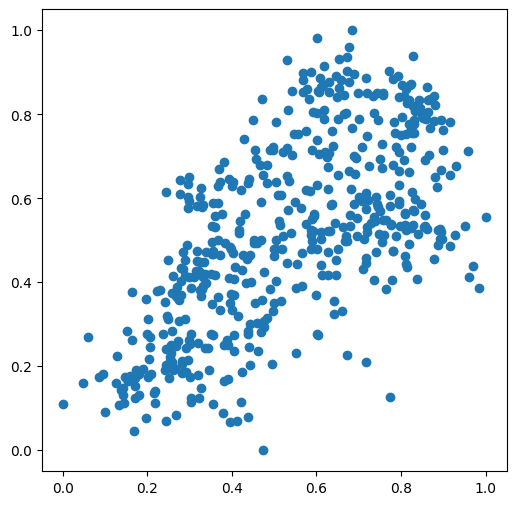

In [557]:
# Visualising one correlation metrics for reference to show the positive correlation
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Analysis from the heatmap. We will start of with one variable at a time and keep on adding the variable
- It shows the multicollinearity between variables and has igh correlation with target variable cnt
- Target variable have correlation with year, temp, atemp variables

In [558]:
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train


In [559]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [560]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,1


#### RFE - Recursive Feature Elimination 

In [561]:
# Running RFE
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(estimator=lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [562]:
# List of selected variables
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 13),
 ('Light_snow', True, 1),
 ('Mist', True, 1)]

In [563]:
# Seleting the selected variables via RFE
var_col = X_train.columns[rfe.support_]
var_col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'summer', 'winter', 'july', 'sep', 'sat', 'sun', 'Light_snow',
       'Mist'],
      dtype='object')

In [564]:
# Identifying the rejected columns
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [565]:
# Creating data frame with RFE selected variables
X_train_rfe = X_train[var_col]

In [566]:
X_train_rfe.dtypes

year            int64
holiday         int64
workingday      int64
temp          float64
humidity      float64
windspeed     float64
spring          int32
summer          int32
winter          int32
july            int32
sep             int32
sat             int32
sun             int32
Light_snow      int32
Mist            int32
dtype: object

#### Model 1

In [567]:
# Create a data frame with all feature variables and its respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.68
11,sat,12.20
12,sun,11.79
6,spring,5.02
3,temp,3.62
8,winter,3.49
1,holiday,2.91
7,summer,2.62
4,humidity,1.91
14,Mist,1.57


Working day variable shows shows high VIF

In [568]:
# build a model with all variables
X_train_sm = sm.add_constant(X_train_rfe)

# create model
lr_1 = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr_1.fit()

# params
lr_model.params

const         0.199526
year          0.229763
holiday      -0.018447
workingday    0.083669
temp          0.527708
humidity     -0.161086
windspeed    -0.180875
spring       -0.055546
summer        0.053733
winter        0.099214
july         -0.054616
sep           0.081983
sat           0.093668
sun           0.040636
Light_snow   -0.245009
Mist         -0.056344
dtype: float64

In [569]:
# Summary of linear regression model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.11e-191
Time:                        01:56:27   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1995      0.028      7.200      0.000       0.145       0.254
year           0.2298      0.008     28.647      0.000       0.214       0.246
holiday       -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday     0.0837      0.010      8.665      0.000       0.065       0.103
temp           0.5277      0.033     15.884      0.000       0.462       0.593
humidity      -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed     -0.1809      0.025     -7.118      0.000      -0.231      -0.131
spring        -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer         0.0537      0.015      3.631      0.000       0.025       0.083
winter         0.0992      0.017      5.815      0.000       0.066       0.133
july          -0.0546      0.018     -3.019      0.003      -0.090      -0.019
sep            0.0820      0.017      4.966      0.000       0.050       0.114
sat            0.0937      0.012      8.040      0.000       0.071       0.117
sun            0.0406      0.012      3.315      0.001       0.017       0.065
Light_snow    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist          -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     8.18e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.26e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Analysis
- Decided to remove workingday variable which has high VIF

#### Model 2

In [570]:
# Decided to drop working day variable as it has high VIF
X = X_train_rfe.drop('workingday', axis=1)


In [571]:
# Checking VIF once removed working day variable
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,28.25
2,temp,16.06
4,windspeed,4.68
5,spring,4.03
7,winter,3.36
6,summer,2.79
13,Mist,2.30
0,year,2.08
8,july,1.59
9,sep,1.39


Once high VIF variable got removed other variables VIFs are reduced

In [572]:
# Build a model after removing workingday variable
X_train_sm = sm.add_constant(X)

# create model
lr_1 = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr_1.fit()

# params
lr_model.params

const         0.283196
year          0.229763
holiday      -0.102116
temp          0.527708
humidity     -0.161086
windspeed    -0.180875
spring       -0.055546
summer        0.053733
winter        0.099214
july         -0.054616
sep           0.081983
sat           0.009998
sun          -0.043033
Light_snow   -0.245009
Mist         -0.056344
dtype: float64

In [573]:
# Summary of linear regression model after removing working day variable
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.11e-191
Time:                        02:00:17   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2832      0.034      8.300      0.000       0.216       0.350
year           0.2298      0.008     28.647      0.000       0.214       0.246
holiday       -0.1021      0.025     -4.024      0.000      -0.152      -0.052
temp           0.5277      0.033     15.884      0.000       0.462       0.593
humidity      -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed     -0.1809      0.025     -7.118      0.000      -0.231      -0.131
spring        -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer         0.0537      0.015      3.631      0.000       0.025       0.083
winter         0.0992      0.017      5.815      0.000       0.066       0.133
july          -0.0546      0.018     -3.019      0.003      -0.090      -0.019
sep            0.0820      0.017      4.966      0.000       0.050       0.114
sat            0.0100      0.011      0.897      0.370      -0.012       0.032
sun           -0.0430      0.012     -3.725      0.000      -0.066      -0.020
Light_snow    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist          -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analysis
- Decided to remove humidity variable which has high VIF

#### Model 3

In [575]:
# Decided to drop humidity variable as it has high VIF
X = X.drop('humidity', axis=1)

In [576]:
# Checking VIF once removed humidity variable
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.18
3,windspeed,4.63
5,summer,2.24
4,spring,2.13
0,year,2.07
6,winter,1.84
7,july,1.59
12,Mist,1.56
8,sep,1.34
9,sat,1.23


Once high VIF variable got removed other variables VIFs are reduced

In [577]:
# Build a model after removing humidity variable
X_train_sm = sm.add_constant(X)

# create model
lr_1 = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr_1.fit()

# params
lr_model.params

const         0.203679
year          0.233727
holiday      -0.102859
temp          0.491531
windspeed    -0.149066
spring       -0.065505
summer        0.047677
winter        0.084588
july         -0.049633
sep           0.075934
sat           0.011757
sun          -0.046120
Light_snow   -0.289513
Mist         -0.082161
dtype: float64

In [578]:
# Summary of linear regression model after removing humidity variable
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.28e-188
Time:                        02:08:07   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2037      0.029      6.972      0.000       0.146       0.261
year           0.2337      0.008     28.828      0.000       0.218       0.250
holiday       -0.1029      0.026     -3.983      0.000      -0.154      -0.052
temp           0.4915      0.033     15.027      0.000       0.427       0.556
windspeed     -0.1491      0.025     -6.024      0.000      -0.198      -0.100
spring        -0.0655      0.021     -3.147      0.002      -0.106      -0.025
summer         0.0477      0.015      3.180      0.002       0.018       0.077
winter         0.0846      0.017      4.971      0.000       0.051       0.118
july          -0.0496      0.018     -2.702      0.007      -0.086      -0.014
sep            0.0759      0.017      4.537      0.000       0.043       0.109
sat            0.0118      0.011      1.037      0.300      -0.011       0.034
sun           -0.0461      0.012     -3.931      0.000      -0.069      -0.023
Light_snow    -0.2895      0.024    -11.880      0.000      -0.337      -0.242
Mist          -0.0822      0.009     -9.514      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analysis
- Decided to remove sat variable which has high p-value

#### Model 4

In [579]:
# Decided to drop sat variable as it has high p-value
X = X.drop('sat', axis=1)

In [580]:
# Checking VIF once removed sat variable
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.60
5,summer,2.24
4,spring,2.11
0,year,2.07
6,winter,1.81
7,july,1.59
11,Mist,1.56
8,sep,1.34
9,sun,1.18


In [581]:
# Build a model after removing sat variable
X_train_sm = sm.add_constant(X)

# create model
lr_1 = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr_1.fit()

# params
lr_model.params

const         0.206034
year          0.233472
holiday      -0.105201
temp          0.490684
windspeed    -0.147854
spring       -0.065521
summer        0.047536
winter        0.084806
july         -0.049235
sep           0.076013
sun          -0.048345
Light_snow   -0.289492
Mist         -0.082198
dtype: float64

In [582]:
# Summary of linear regression model after removing sat variable
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.45e-189
Time:                        02:12:30   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2060      0.029      7.074      0.000       0.149       0.263
year           0.2335      0.008     28.807      0.000       0.218       0.249
holiday       -0.1052      0.026     -4.089      0.000      -0.156      -0.055
temp           0.4907      0.033     15.004      0.000       0.426       0.555
windspeed     -0.1479      0.025     -5.981      0.000      -0.196      -0.099
spring        -0.0655      0.021     -3.147      0.002      -0.106      -0.025
summer         0.0475      0.015      3.171      0.002       0.018       0.077
winter         0.0848      0.017      4.984      0.000       0.051       0.118
july          -0.0492      0.018     -2.680      0.008      -0.085      -0.013
sep            0.0760      0.017      4.541      0.000       0.043       0.109
sun           -0.0483      0.012     -4.191      0.000      -0.071      -0.026
Light_snow    -0.2895      0.024    -11.878      0.000      -0.337      -0.242
Mist          -0.0822      0.009     -9.517      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       63.016   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.263
Skew:                          -0.633   Prob(JB):                     4.30e-35
Kurtosis:                       5.417   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analysis
- Decided to remove july variable which has high p-value

#### Model 5

In [583]:
# Decided to drop sat variable as it has high p-value
X = X.drop('july', axis=1)

In [584]:
# Checking VIF once removed July variable
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,year,2.07
4,spring,2.02
5,summer,1.91
6,winter,1.66
10,Mist,1.55
7,sep,1.23
8,sun,1.18
9,Light_snow,1.08


In [585]:
# Build a model after removing sat variable
X_train_sm = sm.add_constant(X)

# create model
lr_1 = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr_1.fit()

# params
lr_model.params

const         0.198086
year          0.234000
holiday      -0.104300
temp          0.478161
windspeed    -0.148022
spring       -0.054372
summer        0.062284
winter        0.096907
sep           0.089359
sun          -0.049479
Light_snow   -0.290403
Mist         -0.080899
dtype: float64

In [586]:
# Summary of linear regression model after removing july variable
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.23e-189
Time:                        02:16:06   Log-Likelihood:                 503.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     498   BIC:                            -933.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1981      0.029      6.794      0.000       0.141       0.255
year           0.2340      0.008     28.703      0.000       0.218       0.250
holiday       -0.1043      0.026     -4.029      0.000      -0.155      -0.053
temp           0.4782      0.033     14.682      0.000       0.414       0.542
windspeed     -0.1480      0.025     -5.951      0.000      -0.197      -0.099
spring        -0.0544      0.021     -2.649      0.008      -0.095      -0.014
summer         0.0623      0.014      4.439      0.000       0.035       0.090
winter         0.0969      0.017      5.870      0.000       0.064       0.129
sep            0.0894      0.016      5.557      0.000       0.058       0.121
sun           -0.0495      0.012     -4.265      0.000      -0.072      -0.027
Light_snow    -0.2904      0.025    -11.843      0.000      -0.339      -0.242
Mist          -0.0809      0.009     -9.324      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       67.238   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.903
Skew:                          -0.684   Prob(JB):                     2.56e-36
Kurtosis:                       5.417   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analysis so far, 
- This Model looks good with significant p-value and very low VIF values
- It is with very low multicollinearity between predictor variables and p-values for all the predictor variables
- This model looks significant
- We will consider this a final model for train set and proceed with test set

### Step 4. Residual Analysis

In [588]:
# Residual analysis of train data to very the error terms distribution
y_train_pred = lr_model.predict(X_train_sm)

<Axes: ylabel='Density'>

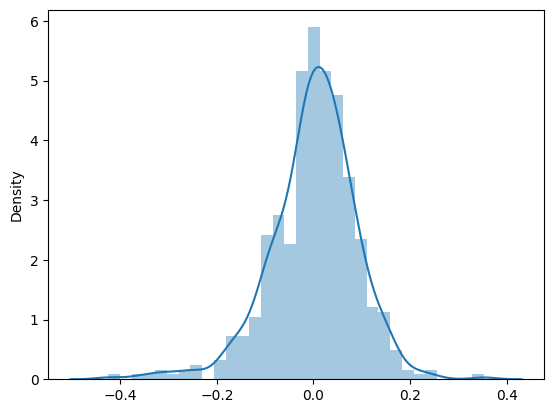

In [589]:
# Plot a histogram of the error terms
res = y_train - y_train_pred
sns.distplot(res)

Error terms are normally distributed

### Step 5: Predictions and evaluation on the data set
- All preprocessing steps done on training set needs to replicate in test set

In [590]:
# create a list of numeric variables 
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

# 2. transform on data

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [591]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [592]:
# Perform the same like training set
y_test = df_test.pop('cnt')
X_test = df_test

In [593]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [594]:
X_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [595]:
# Selecting the columns that were part of final model
final_col=X.columns
X_test=X_test[final_col]
# add a constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,year,holiday,temp,windspeed,spring,summer,winter,sep,sun,Light_snow,Mist
184,1.0,0,1,0.831783,0.084219,0,0,0,0,0,0,1
535,1.0,1,0,0.901354,0.153728,0,1,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,1,0,0,0,0,0


In [596]:
# predictions using final model
y_test_pred = lr_model.predict(X_test_sm)

#### Model Evaluation

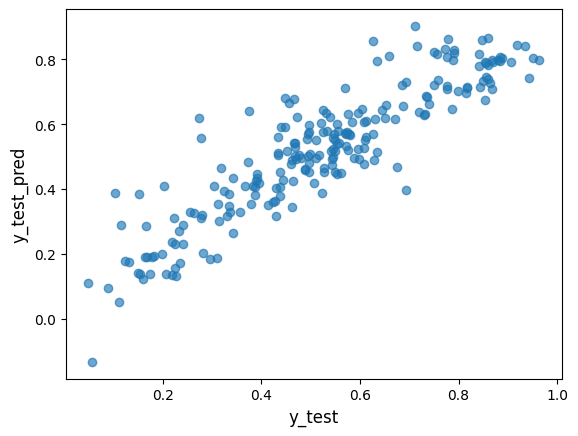

In [602]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.65)
plt.xlabel('y_test', fontsize = 12)
plt.ylabel('y_test_pred', fontsize = 12) 
plt.show()

#### R2 Squared evaluation

In [604]:
# evaluate r2 score
r_squared = r2_score(y_true=y_test, y_pred=y_test_pred)
r_squared

0.8065603970953668

#### Adjusted R2 Squared evaluation

In [605]:
# number of rows in X
n = X_test.shape[0]

# number of predictors
p = X_test.shape[1]

# Evaluate Adjusted R2
adjusted_r_squared = 1-(1-r_squared)*(n-1)/(n-p-1)
adjusted_r_squared

0.7963304180956025

In [611]:
# Evaluate Adjusted R2 for train data

# number of rows in X
n = X.shape[0]

# number of predictors
p = X.shape[1]
train_r2 = 0.84
adjusted_train = 1-(1-train_r2)*(n-1)/(n-p-1)
adjusted_train

0.8364658634538152

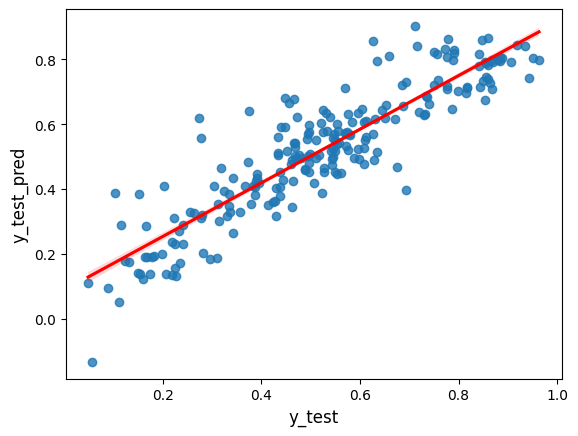

In [609]:
# Visualizing the fit on the test data using regresion plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True, line_kws={"color": "red"})
plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_test_pred', fontsize=12)
plt.show()

### Conclusion

Final analysis,
- R-Squared for test data : 0.81
- Adjusted R-Squared for test data : 0.80
- R-Squared for train data : 0.84
- Adjusted R-Squared for train data : 0.84

Bikes rental demand is based on the variables year, holiday, temp, windspeed, spring, summer, winter, sep, sun, Light_snow, Mist